# Контекст

- изучить наилучший метод кластеризации для разных видов данных
- визуализировать результаты

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

from sklearn.datasets._samples_generator import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

# Представление данных

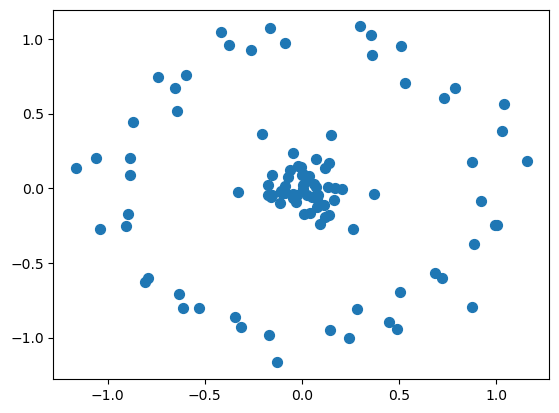

In [2]:
def circles(plot = False):
    X,y = make_circles(100,factor = .1, noise = .1, random_state = 42)
    if plot:
        plt.scatter(X[:,0], X[:,1] , s=50)
    return X

X = circles(True)

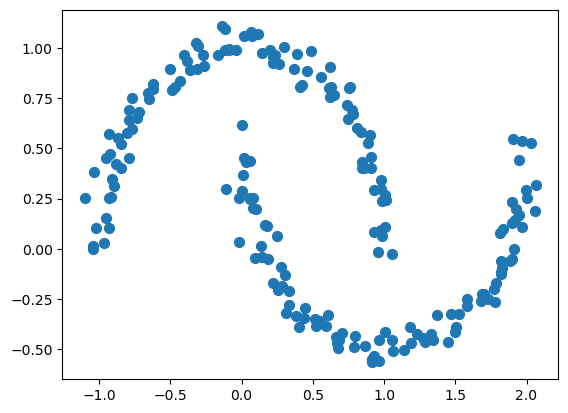

In [3]:
def moons(plot = False):
    X, y = make_moons(200, noise=.05, random_state = 42)
    if plot:
        plt.scatter(X[:, 0], X[:, 1],s=50)
    return X

X = moons(True)

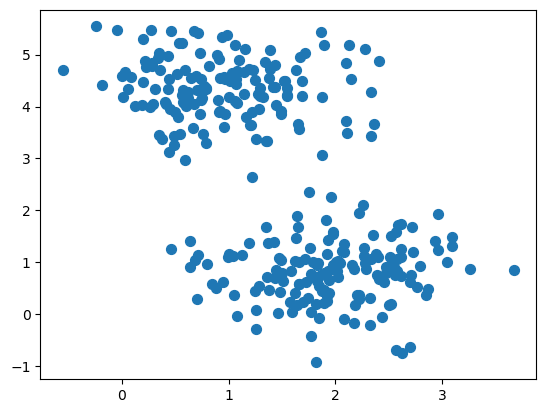

In [4]:
def blobs(plot = False):
    X, y = make_blobs(n_samples = 300, centers = 2,cluster_std=0.60, random_state = 0)
    if plot:
        plt.scatter(X[:, 0], X[:, 1], s = 50)
    return X

X = blobs(True)

# Методы кластеризации

In [5]:
datas = [circles(), blobs(), moons()]

## KMeans

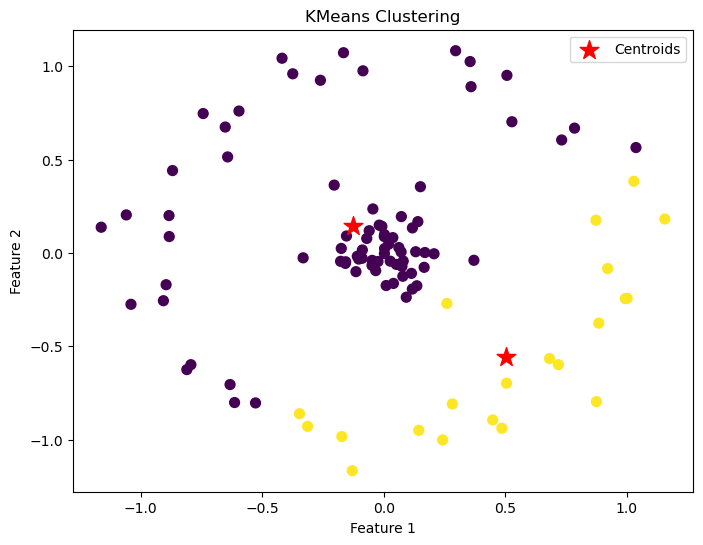

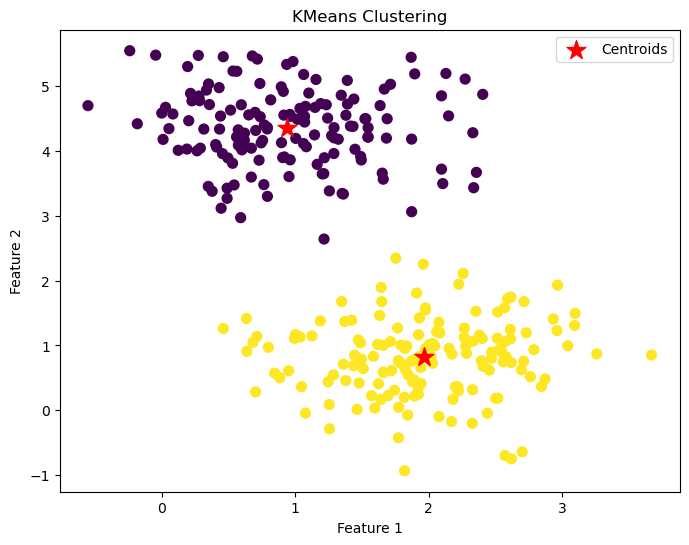

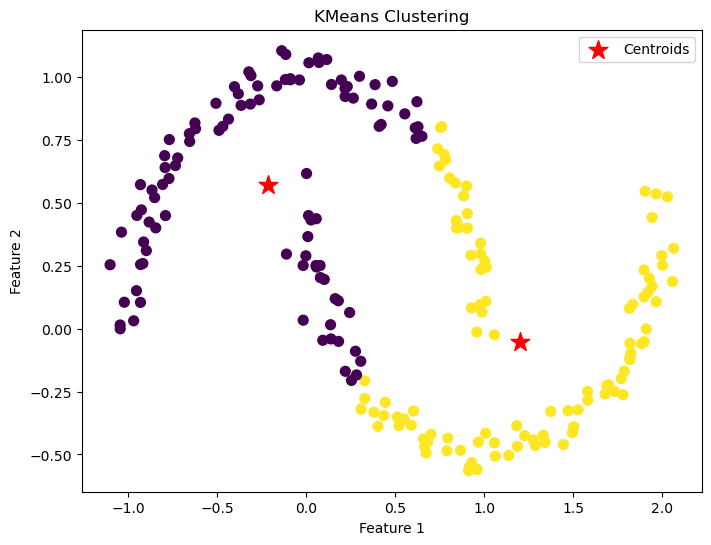

In [6]:
from sklearn.cluster import KMeans

for X in datas:
    kmeans = KMeans(n_clusters = 2, random_state = 42)
    kmeans.fit(X)

    # 4. Получение меток кластеров
    labels = kmeans.labels_
    # 5. Получение центроидов кластеров
    centroids = kmeans.cluster_centers_
    # 6. Визуализация
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s = 200, label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('KMeans Clustering')
    plt.legend()
    plt.show()

## DBSCAN


`eps` (радиус соседства):
     Описание:  Определяет максимальное расстояние между двумя точками, чтобы они считались соседями. 
     
 `min_samples` (минимальное количество точек в соседстве):
     Описание:  Определяет минимальное количество точек,  которые  должны  быть  в  соседстве,  чтобы  точка  считалась  ядром  кластера.
     Как выбрать:
         Плотность данных:  Чем  плотнее  данные,  тем  меньше  min_samples  можно  установить.  
         Размер кластеров:  Если  кластеры  небольшие,  то  `min_samples`  должен  быть  меньше,  чем  размер  кластера. 



Как выбрать отимальные гиперпараметры:
 - строить kdeplot рассояний до N ближайших точек и смотреть на провалы в этом графике (графике расстояния до полседней N точки)
 - выбрать min_samples = N, а eps = точке провала kdeplot

In [211]:
from sklearn.neighbors import NearestNeighbors


def freque_for_clustering(k, X):
    # k - Количество соседей
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors.fit(X)
    distances, indices = neighbors.kneighbors(X)
    distances = distances[:, -1]  # Берем расстояние до k-го соседа

    # 4. Построение гистограммы
    plt.figure(figsize=(10, 2))
    # plt.hist(distances, bins=50)
    sns.kdeplot(distances)
    plt.xlabel(f'Расстояние до {k}-го ближайшего соседа')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма расстояний до {k}-го ближайшего соседа')
    plt.show()

def DBSCAN_scatter(X, eps, min_samples):
    # 3. Инициализация модели DBSCAN
    dbscan = DBSCAN(eps = eps, min_samples = min_samples)
    # 4. Обучение модели
    dbscan.fit(X)
    # 5. Получение меток кластеров
    labels = dbscan.labels_


    cluster_centers = []
    for i in np.unique(labels):
        if i != -1:  # Исключаем шумовые точки
            cluster_indices = np.where(labels == i)[0]
            # Выбираем "центральную" точку для кластера
            central_point = X[cluster_indices][np.argmax(np.linalg.norm(X[cluster_indices] - np.mean(X[cluster_indices], axis=0), axis=1))]
            cluster_centers.append(central_point)
    cluster_centers = np.array(cluster_centers)




    # 6. Визуализация
    plt.figure(figsize=(10, 4))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, marker='*', c='red', label='Центры кластеров')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'DBSCAN Clustering: eps = {eps}, min_samples = {min_samples}')
    plt.show()

### circles

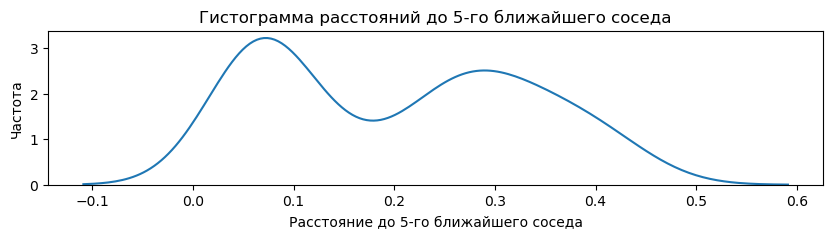

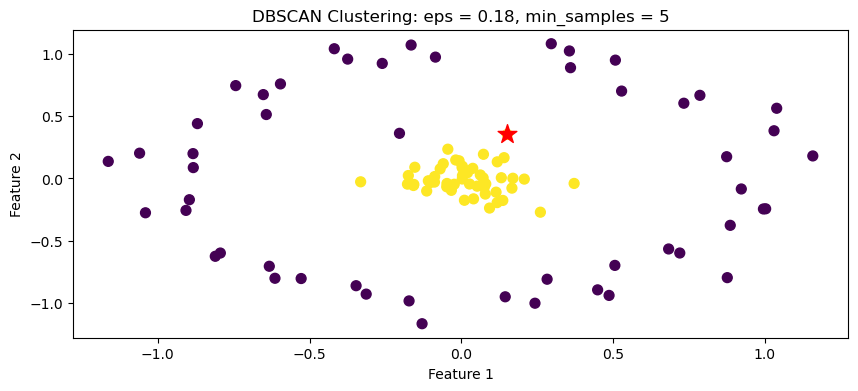

In [214]:
X = circles()
freque_for_clustering(5, X)
DBSCAN_scatter(X, 0.18, 5)

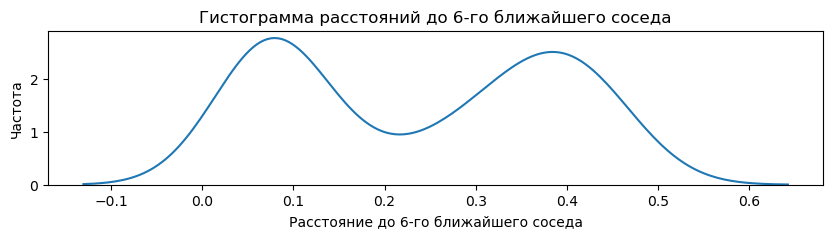

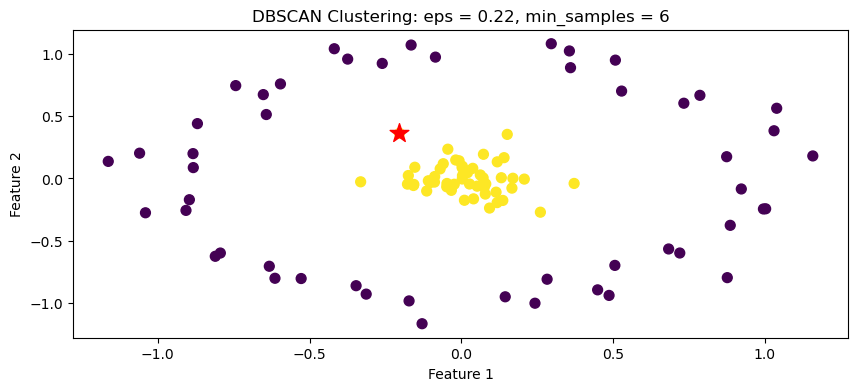

In [215]:
X = circles()
k = 6
freque_for_clustering(k, X)
DBSCAN_scatter(X, 0.22, k)

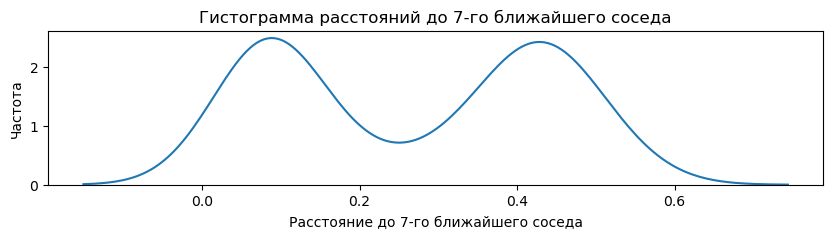

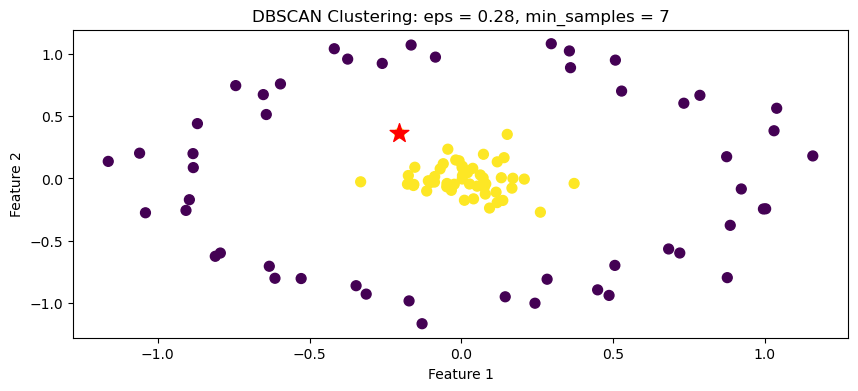

In [216]:
X = circles()
k = 7
freque_for_clustering(k, X)
DBSCAN_scatter(X, 0.28, k)

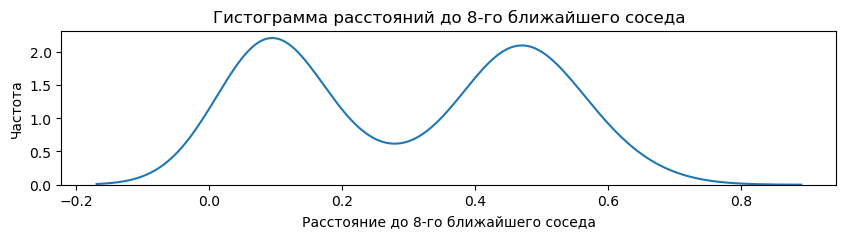

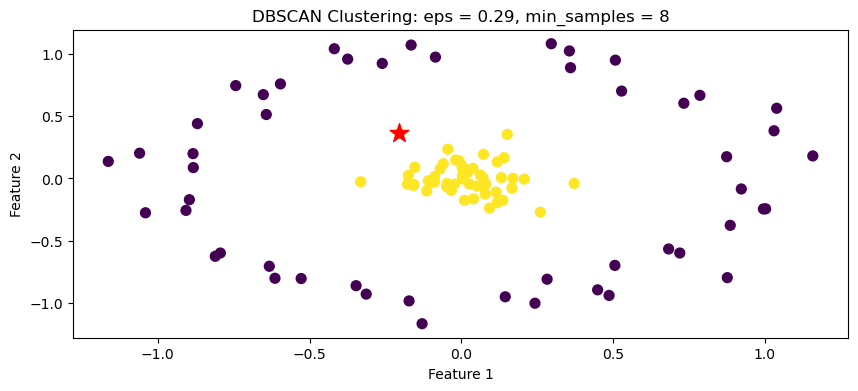

In [217]:
X = circles()
k = 8
freque_for_clustering(k, X)
DBSCAN_scatter(X, 0.29, k)

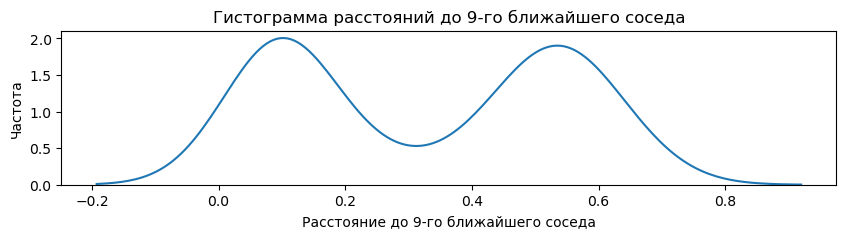

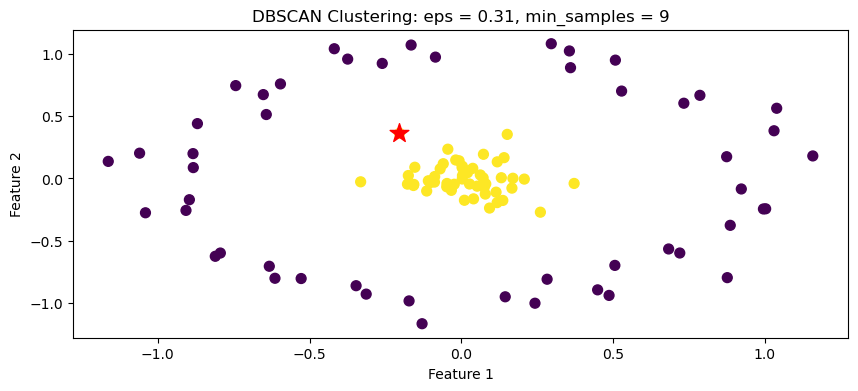

In [218]:
X = circles()
k = 9
freque_for_clustering(k, X)
DBSCAN_scatter(X, 0.31, k)

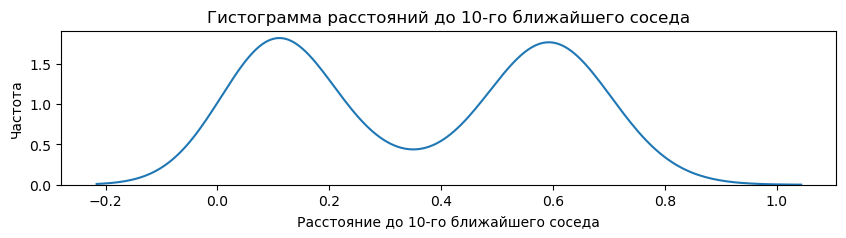

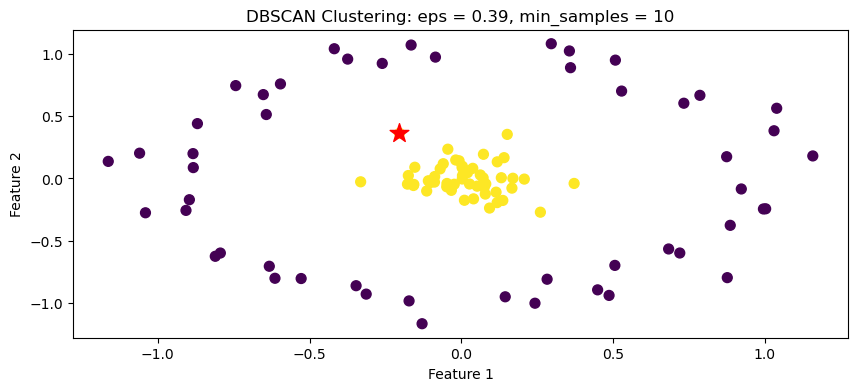

In [219]:
X = circles()
k = 10
freque_for_clustering(k, X)
DBSCAN_scatter(X, 0.39, k)

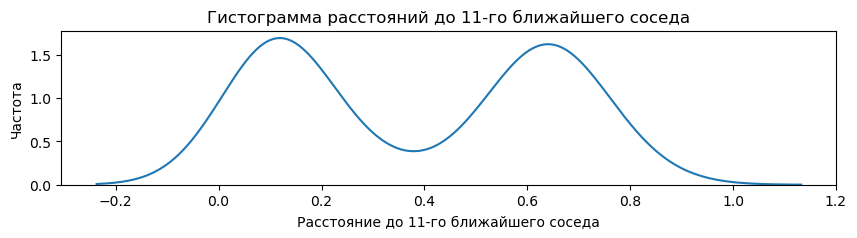

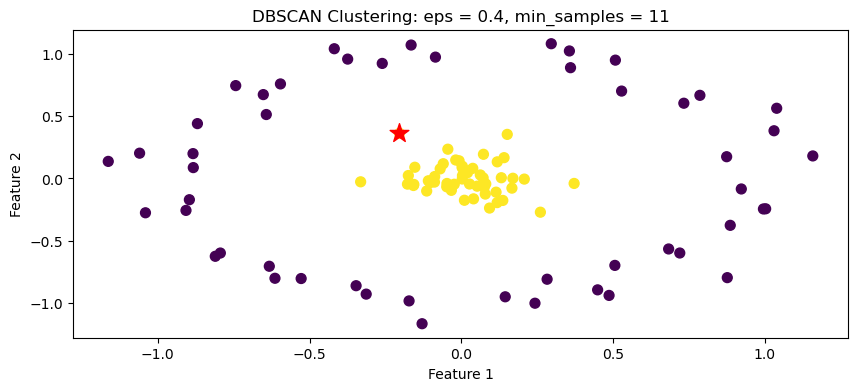

In [220]:
X = circles()
k = 11
freque_for_clustering(k, X)
DBSCAN_scatter(X, 0.4, k)

### moons

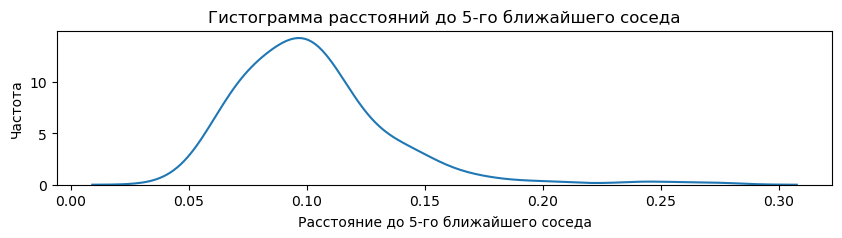

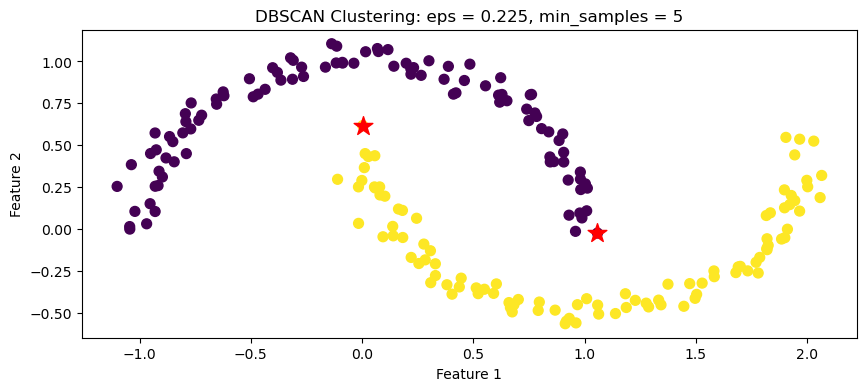

In [221]:
X = moons()
k = 5
freque_for_clustering(k, X)
DBSCAN_scatter(X, 0.225, k)

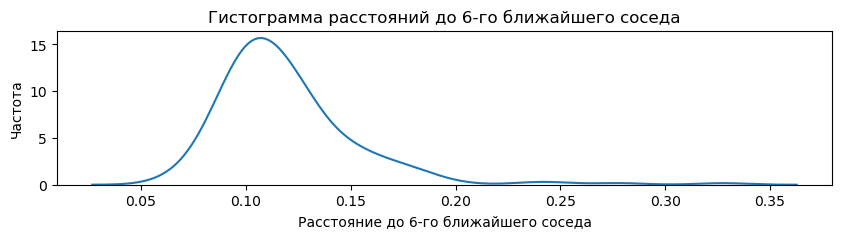

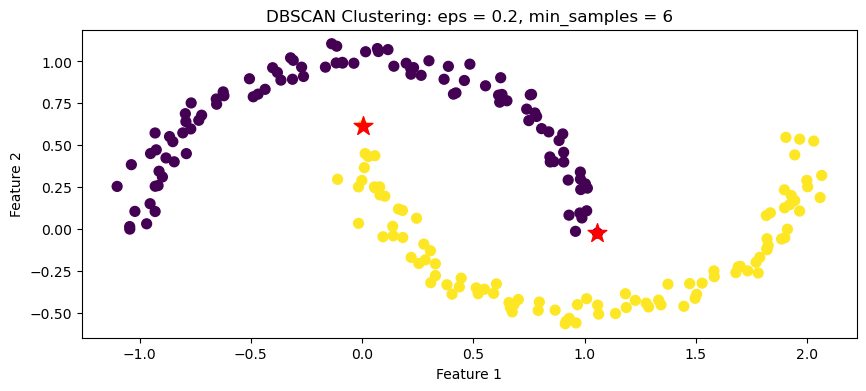

In [222]:
X = moons()
k = 6
freque_for_clustering(k, X)
DBSCAN_scatter(X, 0.2, k)

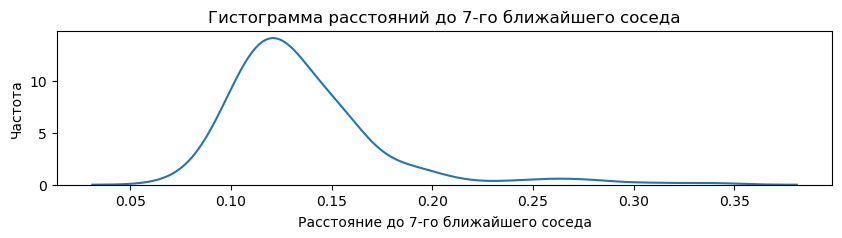

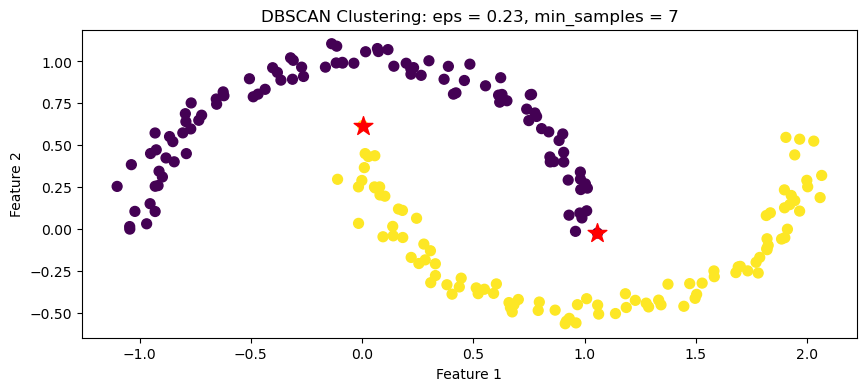

In [223]:
X = moons()
k = 7
freque_for_clustering(k, X)
DBSCAN_scatter(X, 0.23, k)

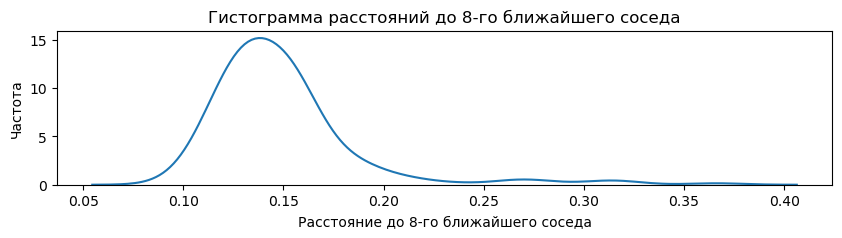

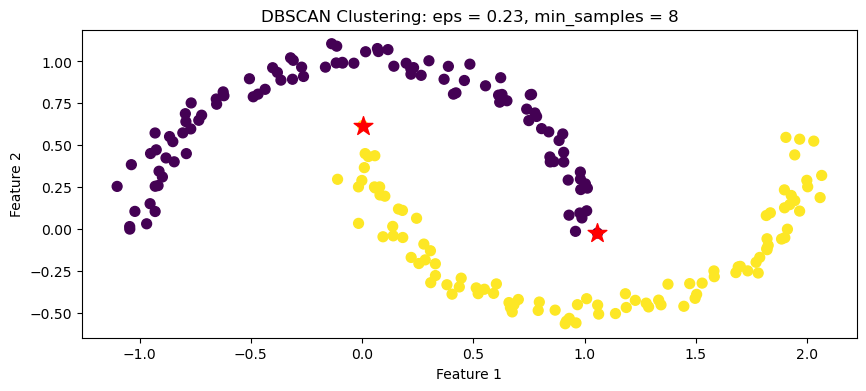

In [224]:
X = moons()
k = 8
freque_for_clustering(k, X)
DBSCAN_scatter(X, 0.23, k)

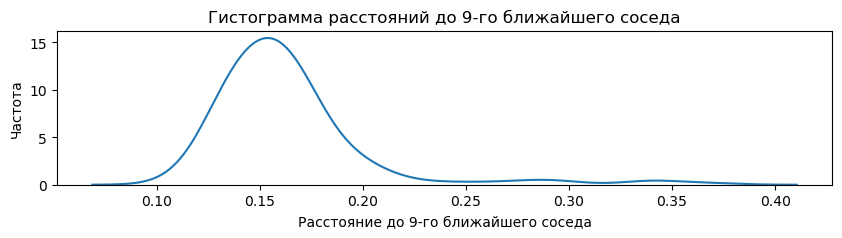

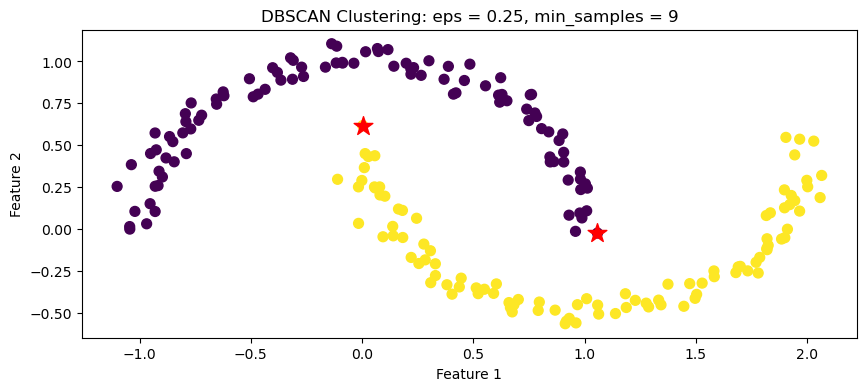

In [225]:
X = moons()
k = 9
freque_for_clustering(k, X)
DBSCAN_scatter(X, 0.25, k)

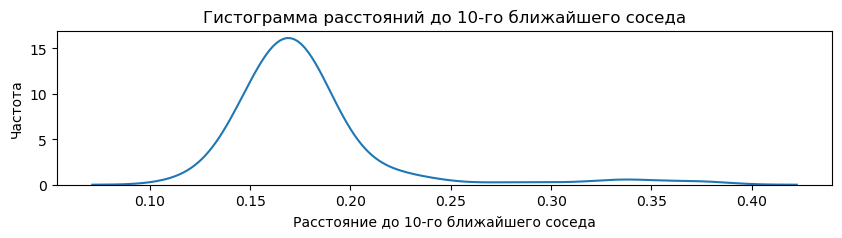

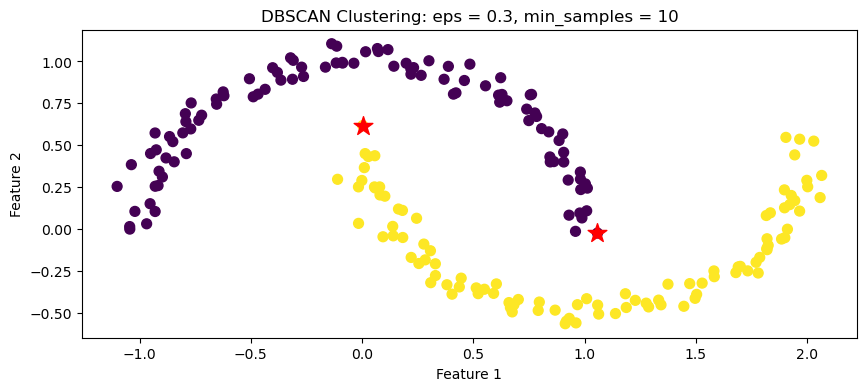

In [226]:
X = moons()
k = 10
freque_for_clustering(k, X)
DBSCAN_scatter(X, 0.3, k)

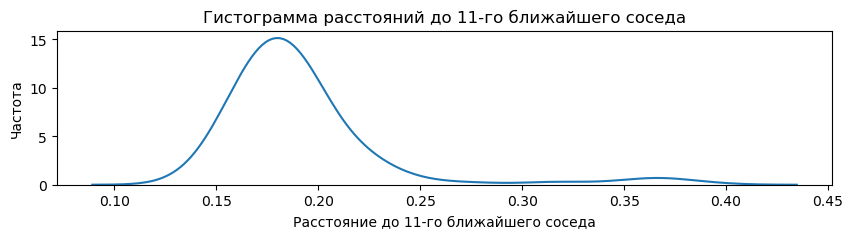

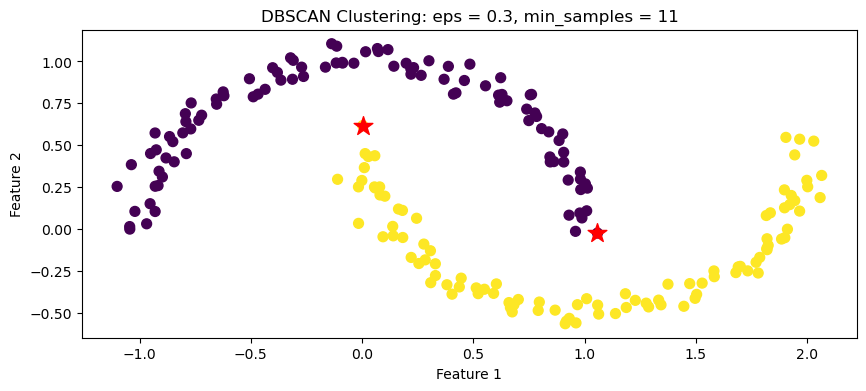

In [227]:
X = moons()
k = 11
freque_for_clustering(k, X)
DBSCAN_scatter(X, 0.3, k)

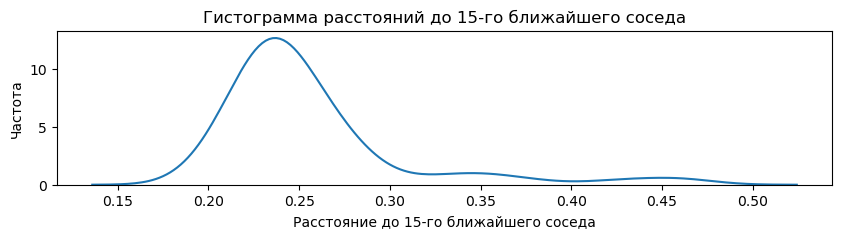

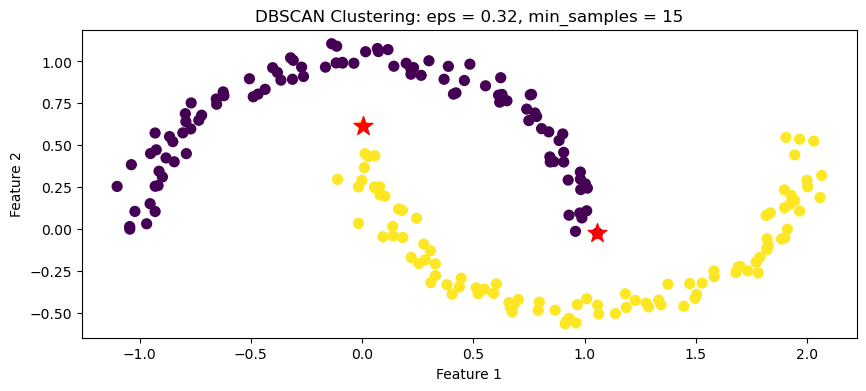

In [228]:
X = moons()
k = 15
freque_for_clustering(k, X)
DBSCAN_scatter(X, 0.32, k)

### blobs

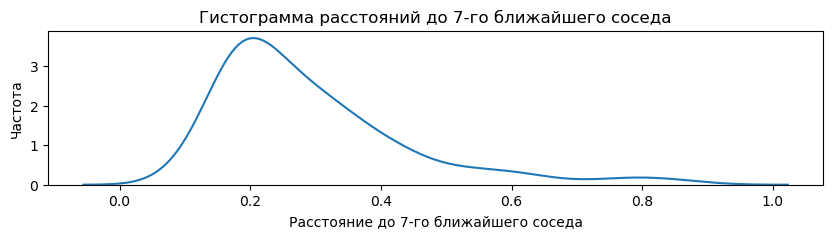

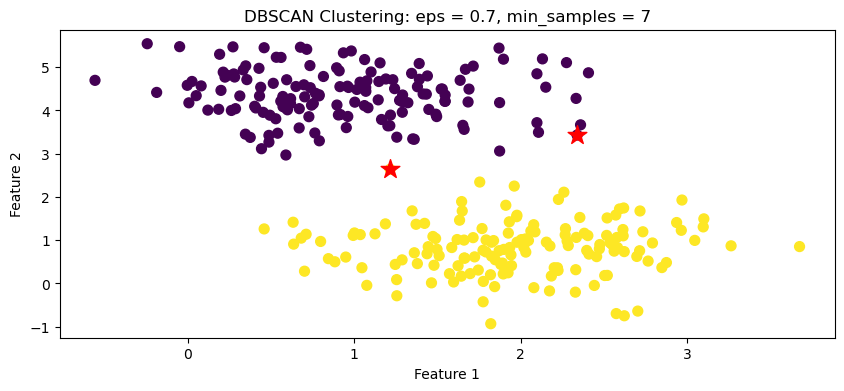

In [229]:
X = blobs()
k = 7
freque_for_clustering(k, X)
DBSCAN_scatter(X, 0.7, k)

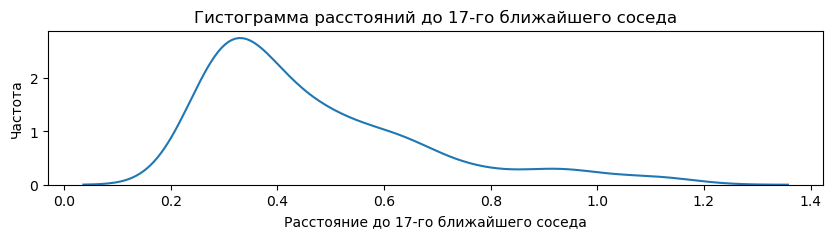

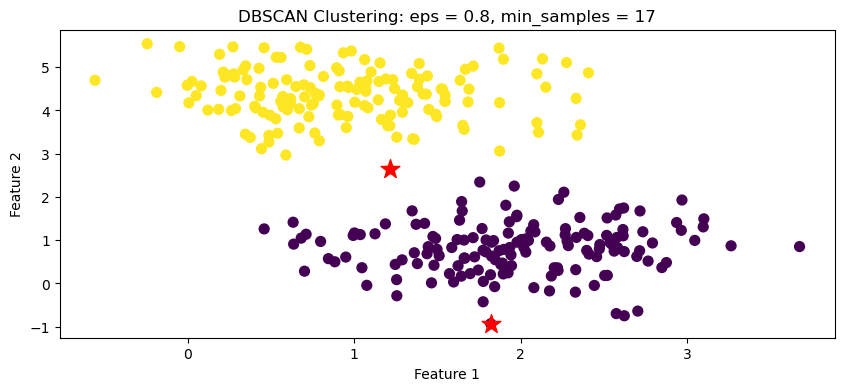

In [230]:
X = blobs()
k = 17
freque_for_clustering(k, X)
DBSCAN_scatter(X, 0.8, k)

## AgglomerativeClustering

- подходит для данных шарообразной структуры
- гиперпараметры clustering = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage='ward')
    - linkage
        - 'ward' - расстояние между центрами кластеров
        - 'average' - среднее расстояние между точками кластеров
        - 'complete' - расстояние между двумя самыми дальними точками
        - 'single' - расстояние между двумя ближайшими точками



- для шарообразных подойдет любой способ (лучше ward)
- для сложных single

In [231]:
def dendo_plot(X, linkage_mode):
    Z = linkage(X, linkage_mode) # 'ward' 'single' 'average' 'complete'
    plt.figure(figsize=(10, 3))
    dendrogram(Z)
    plt.title('Дендрограмма иерархической кластеризации')
    plt.xlabel('Точки данных')
    plt.ylabel('Расстояние')
    plt.show()



def AggloClust_plot(X, n_clusters, linkage_mode):
    clustering = AgglomerativeClustering(n_clusters = n_clusters, metric ='euclidean', linkage = linkage_mode)
    clustering.fit(X)
    y_pred = clustering.labels_


    cluster_centers = np.zeros((clustering.n_clusters, X.shape[1]))
    for i in range(clustering.n_clusters):
        cluster_indices = np.where(y_pred == i)[0]
        cluster_centers[i] = np.mean(X[cluster_indices], axis=0)

    plt.figure(figsize=(10, 3))
    plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, marker='*', c='red', label='Центры кластеров')  
    plt.title(f'Agglomerative Clustering: n_clusters = {n_clusters}, linkage = {linkage_mode}')

### circles

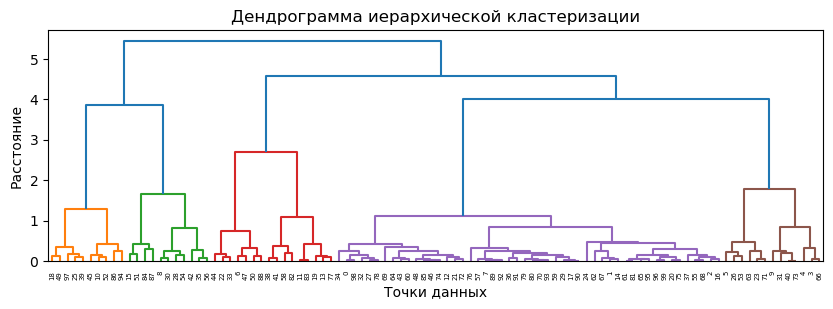

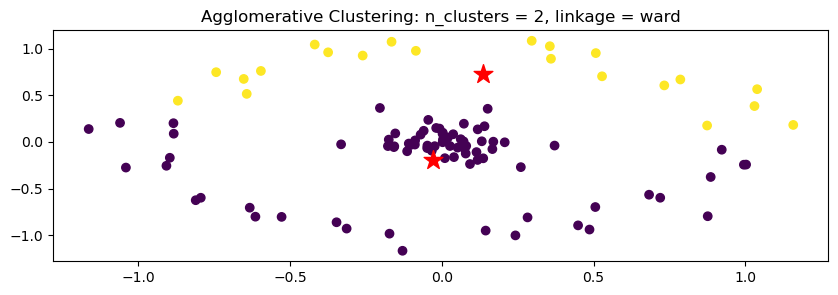

In [232]:
X = circles()
linkage_mode = 'ward'
dendo_plot(X, linkage_mode)
AggloClust_plot(X, 2, linkage_mode)

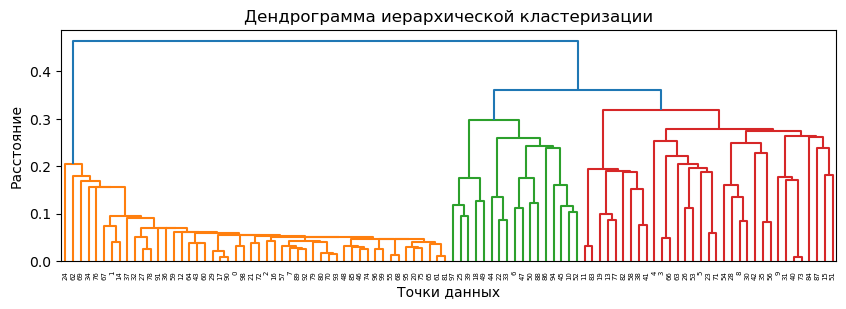

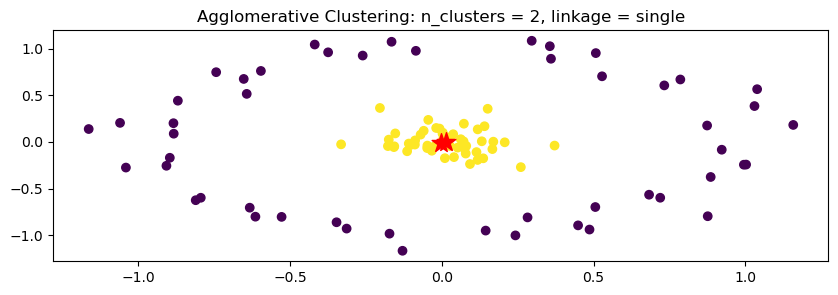

In [233]:
X = circles()
linkage_mode = 'single'
dendo_plot(X, linkage_mode)
AggloClust_plot(X, 2, linkage_mode)

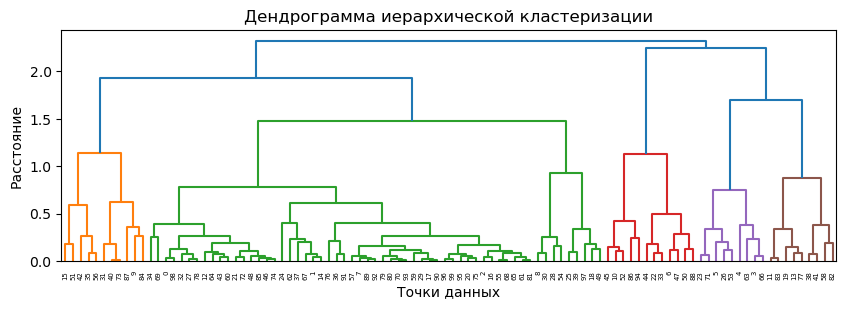

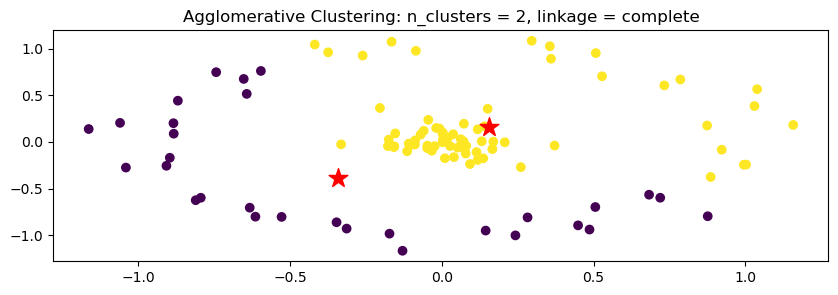

In [234]:
X = circles()
linkage_mode = 'complete'
dendo_plot(X, linkage_mode)
AggloClust_plot(X, 2, linkage_mode)

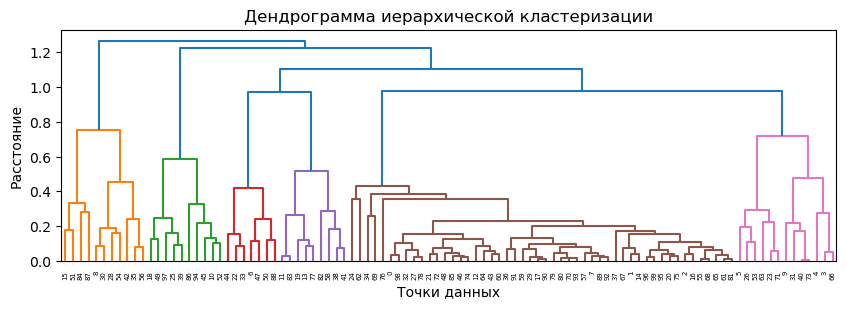

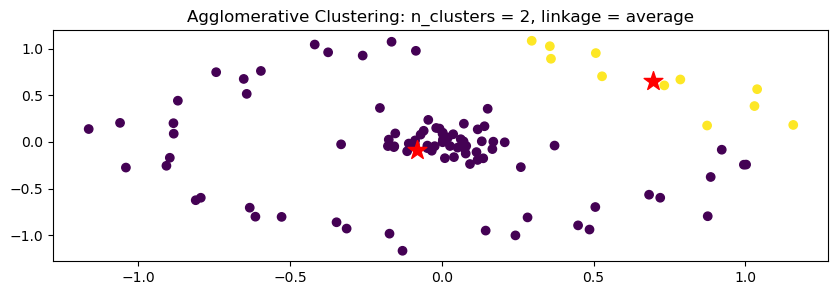

In [235]:
X = circles()
linkage_mode = 'average'
dendo_plot(X, linkage_mode)
AggloClust_plot(X, 2, linkage_mode)

### moons

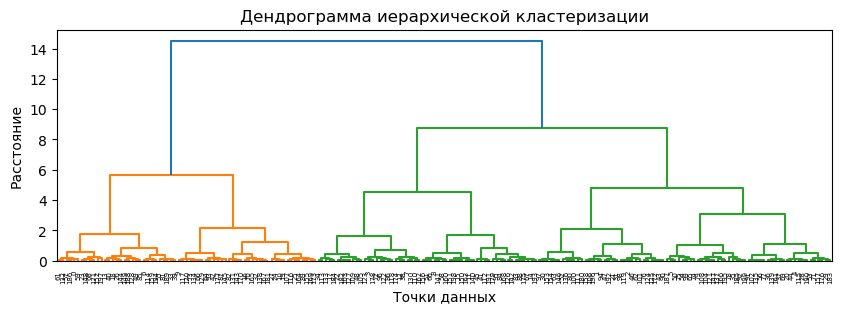

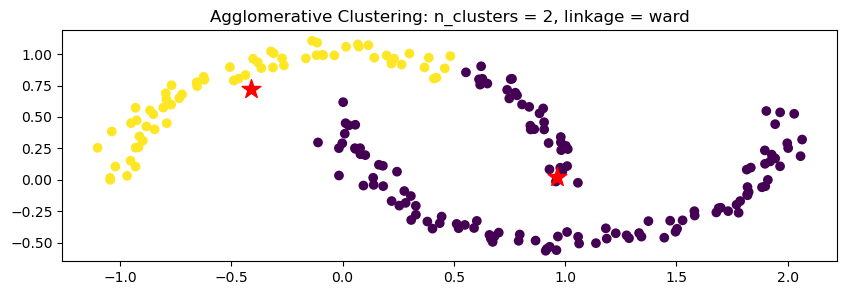

In [236]:
X = moons()
linkage_mode = 'ward'
dendo_plot(X, linkage_mode)
AggloClust_plot(X, 2, linkage_mode)

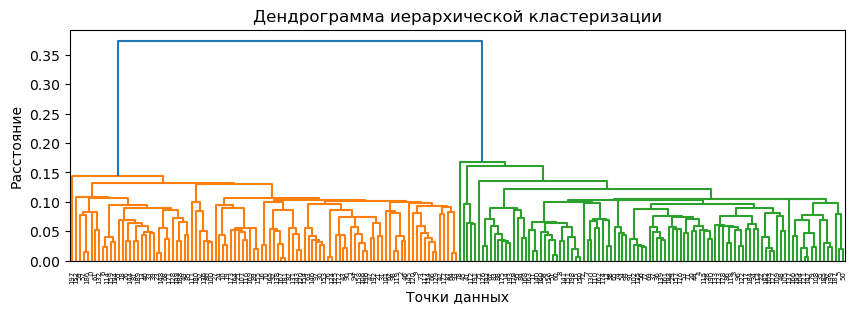

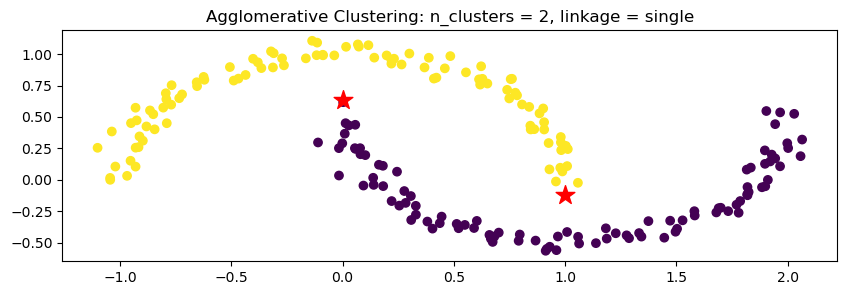

In [237]:
X = moons()
linkage_mode = 'single'
dendo_plot(X, linkage_mode)
AggloClust_plot(X, 2, linkage_mode)

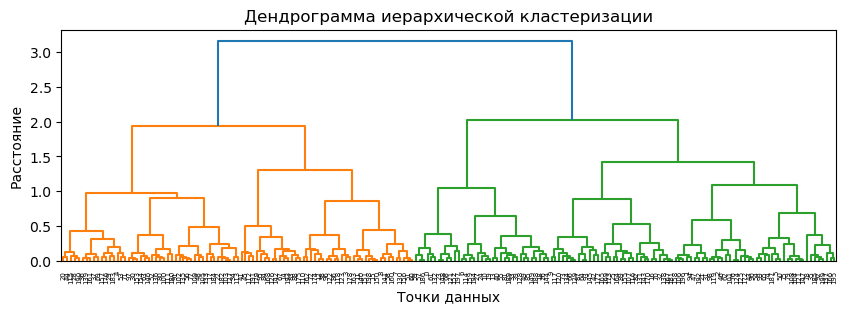

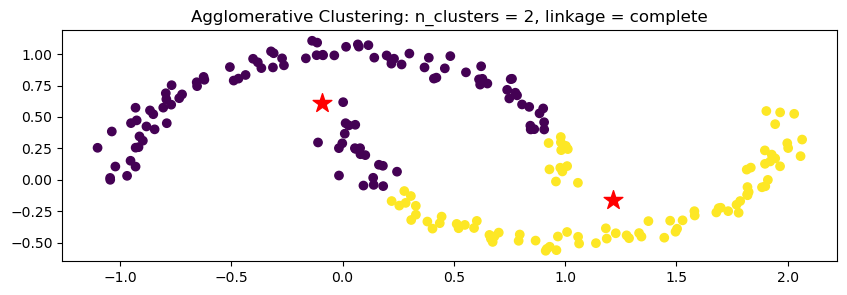

In [238]:
X = moons()
linkage_mode = 'complete'
dendo_plot(X, linkage_mode)
AggloClust_plot(X, 2, linkage_mode)

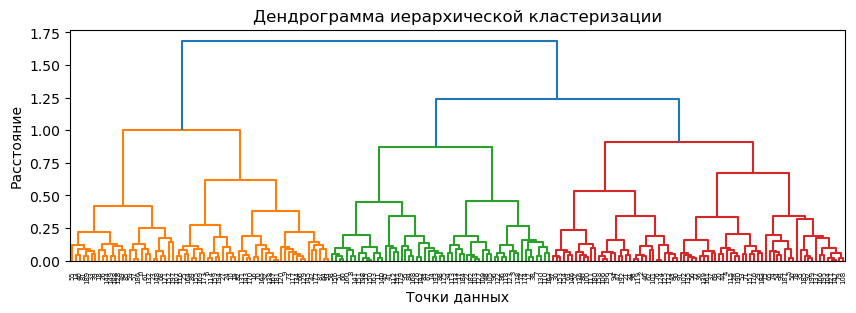

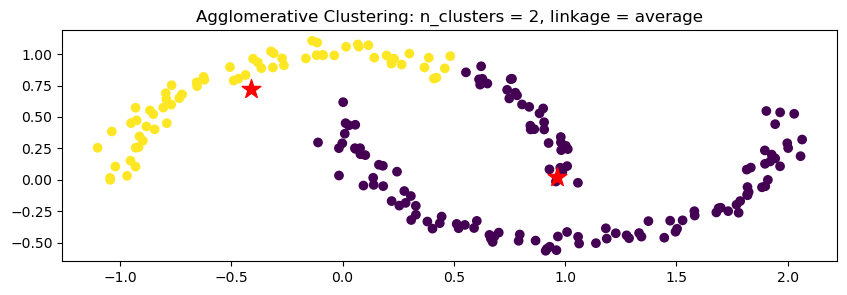

In [239]:
X = moons()
linkage_mode = 'average'
dendo_plot(X, linkage_mode)
AggloClust_plot(X, 2, linkage_mode)

In [ ]:
X = moons()
linkage_mode = 'average'
dendo_plot(X, linkage_mode)
AggloClust_plot(X, 2, linkage_mode)

### blobs

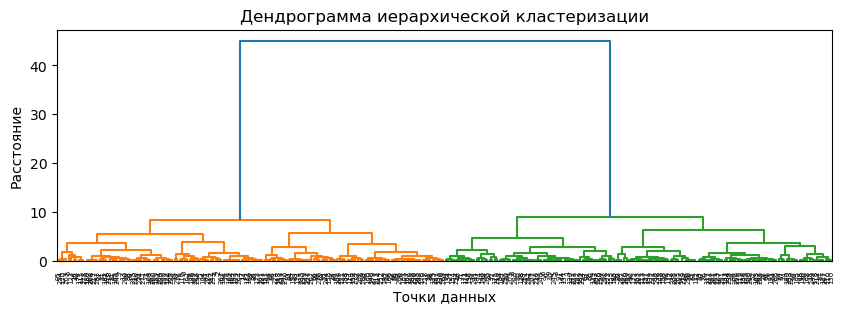

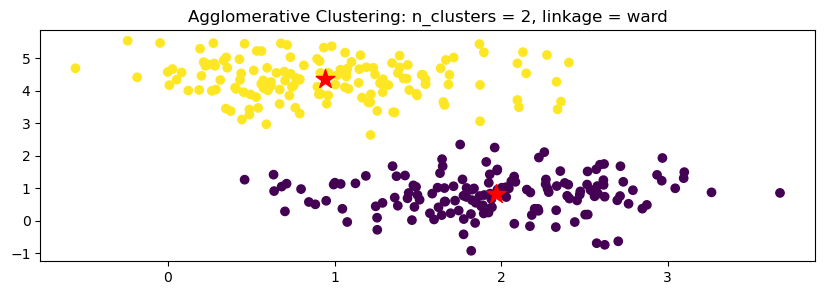

In [241]:
X = blobs()
linkage_mode = 'ward'
dendo_plot(X, linkage_mode)
AggloClust_plot(X, 2, linkage_mode)

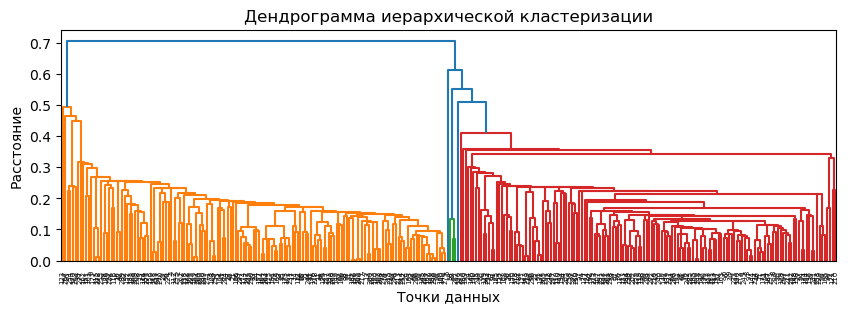

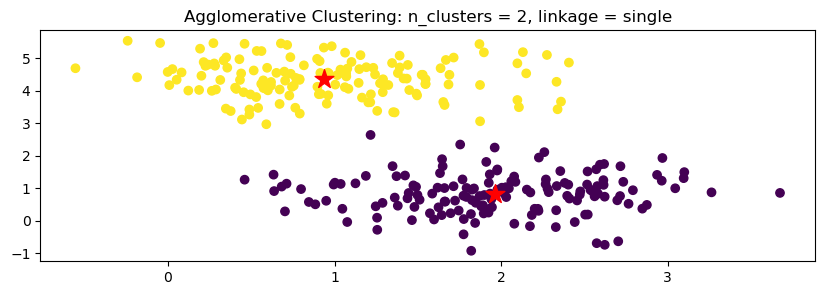

In [244]:
X = blobs()
linkage_mode = 'single'
dendo_plot(X, linkage_mode)
AggloClust_plot(X, 2, linkage_mode)

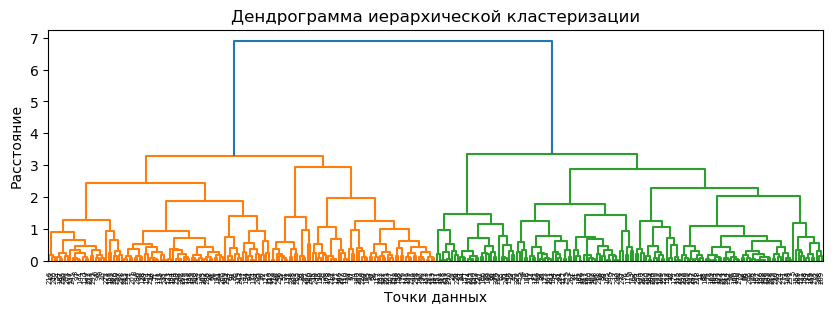

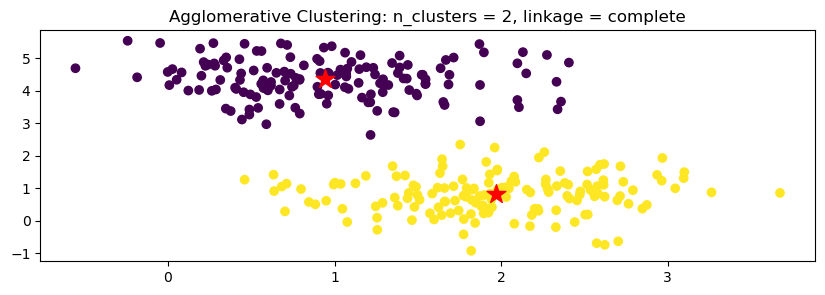

In [245]:
X = blobs()
linkage_mode = 'complete'
dendo_plot(X, linkage_mode)
AggloClust_plot(X, 2, linkage_mode)

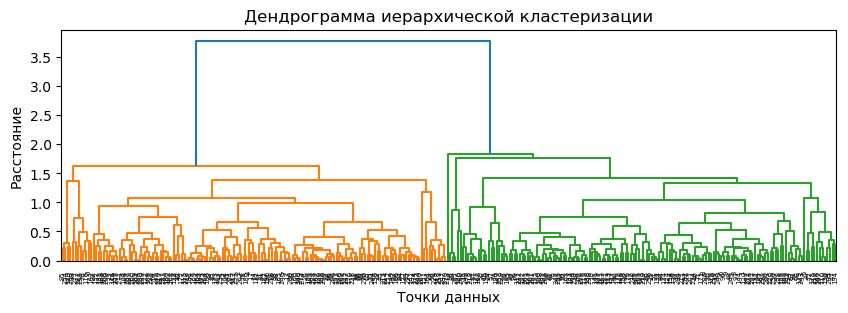

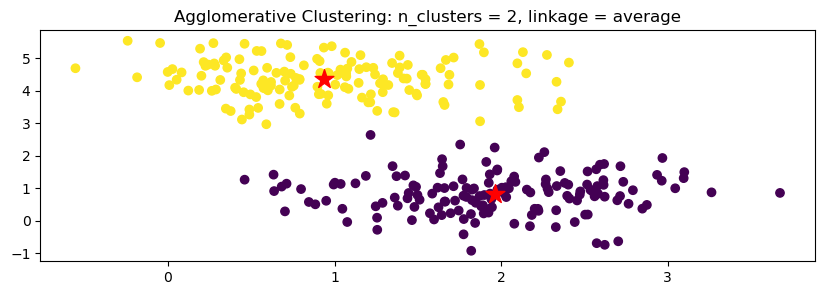

In [246]:
X = blobs()
linkage_mode = 'average'
dendo_plot(X, linkage_mode)
AggloClust_plot(X, 2, linkage_mode)

## OPTICS

- это немного доработанный DBSCAN (не нужно искать гиперпараметр eps, но возникает гиперпараметр xi)
- xi - плотность точек (если значение большое, то мы хотим больше кластеров, т.е. стремимся к большей плотности)
- работает на основе достижимых расстояний (т.е. просто) постоянный расчет расстояний от произвольной группы точек, и если расстояние вдруг становится большим, это маркер разделения на кластер
- смотреть надо на график достижимых расстояний между точками (если есть скачок в расстоянии, это значит, что мы перешли в другой кластер)

In [424]:
from sklearn.cluster import OPTICS


def optic_plot(X, min_samples, xi, min_cluster_size):
    optics = OPTICS(min_samples = min_samples, xi = xi, min_cluster_size = min_cluster_size)
    optics.fit(X)

    # 3. Получение  меток  кластеров
    labels = optics.labels_

    # 4. Визуализация
    plt.figure(figsize=(10, 3))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('OPTICS')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    reachability = optics.reachability_
    # Визуализация графика достижимости
    plt.figure(figsize=(10, 3))
    plt.plot(sorted(optics.ordering_), reachability)
    plt.ylabel('Reachability Distance')
    plt.title('Reachability Plot')
    plt.show()

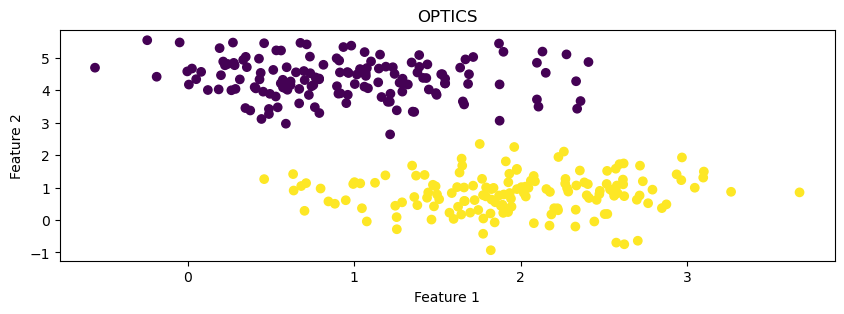

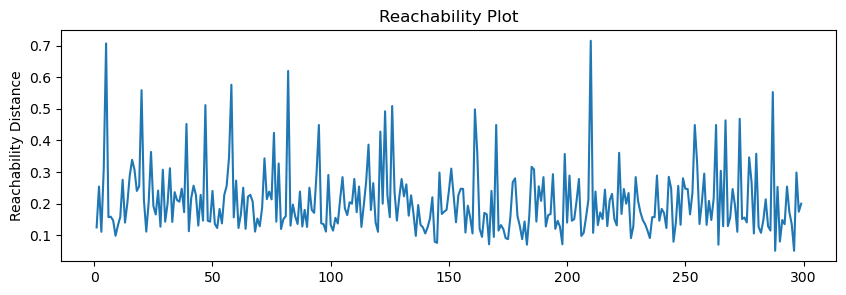

In [425]:
X = blobs()
optic_plot(X, 5, 0.05, 0.5)

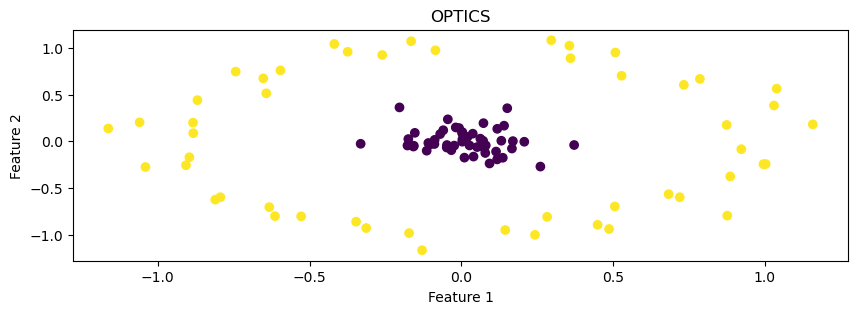

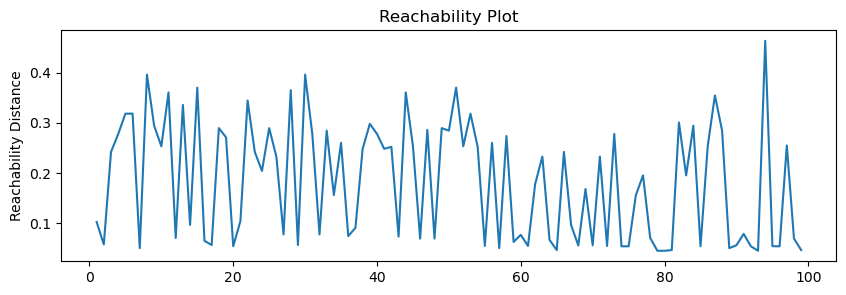

In [426]:
X = circles()
optic_plot(X, 5, 0.05, 0.5)

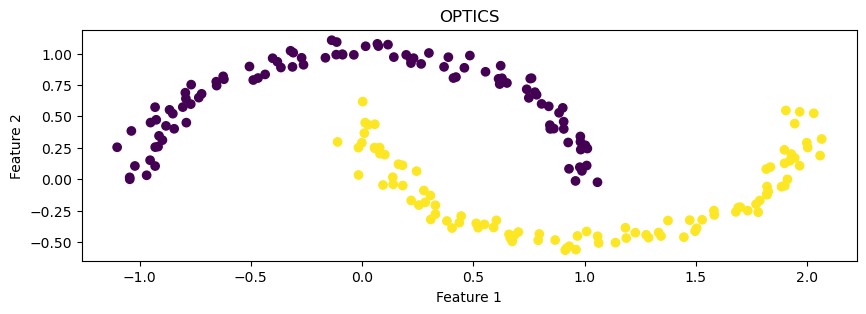

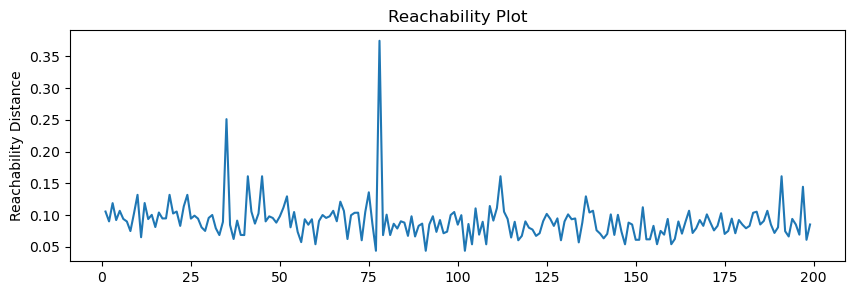

In [427]:
X = moons()
optic_plot(X, 5, 0.05, 0.5)

## MeanShift

- плохо работает на не шарообразных данных
- каждая точка постепенно относится к какому-то кластеру (средним сдвигом к ближайшей точки)
- каждая точка видит область, размер которой = brandwidth (основной гиперпараметр)

In [463]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Генерация случайных данных
# X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

X = blobs()

def meanshift_plot(X, bandwidth):
    # Обучение модели MeanShift
    meanshift = MeanShift(bandwidth = bandwidth)
    meanshift.fit(X)

    # Получение меток кластеров и центров кластеров
    labels = meanshift.labels_
    cluster_centers = meanshift.cluster_centers_
    # Визуализация результатов кластеризации
    plt.figure(figsize=(10, 3))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, marker='*', c='red', label='Центры кластеров')
    plt.title('MeanShift Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

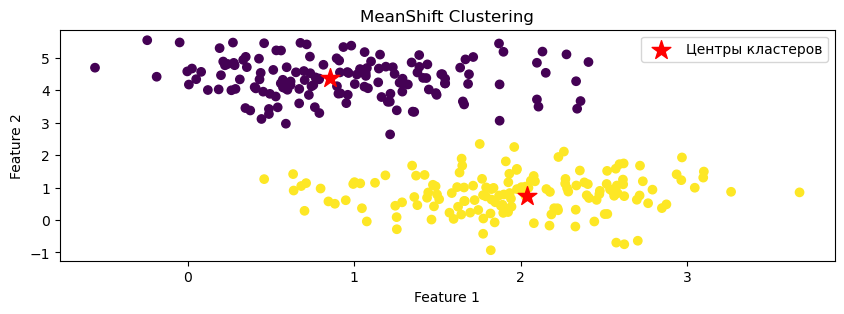

In [464]:
X = blobs()
meanshift_plot(X, 1)

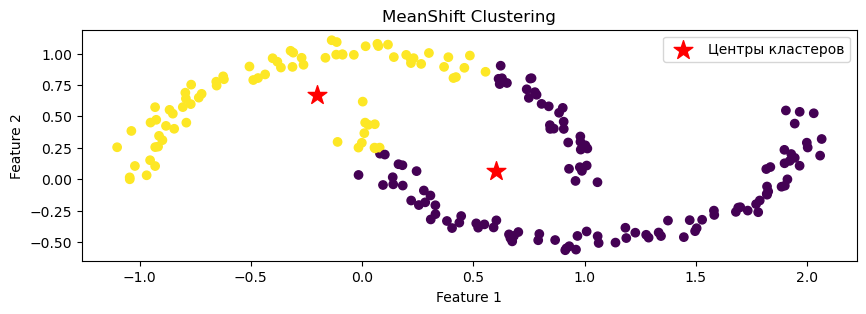

In [461]:
X = moons()
meanshift_plot(X, 0.8)

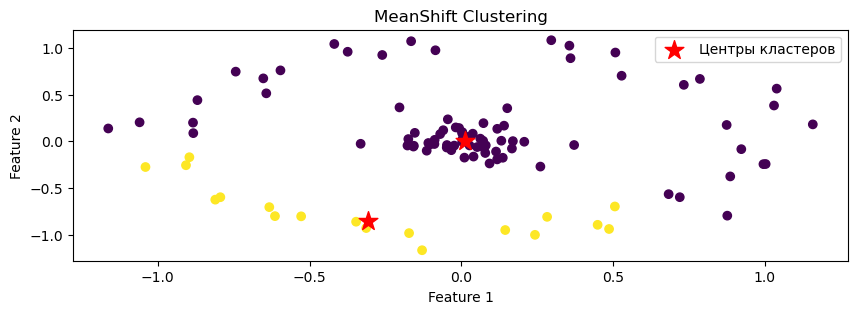

In [481]:
X = circles()
meanshift_plot(X, 0.7)

## Gaussian Mixture Models (GMM)



- плохо работает на не шарообразных данных

 - Алгоритм GMM пытается найти оптимальную смесь гауссовых распределений, которая наилучшим образом объясняет распределение данных.
   - Он использует итеративный алгоритм максимизации ожидания (Expectation-Maximization, EM), который включает в себя два шага:
      - **Шаг E (Expectation):**  Для  каждой  точки  данных  вычисляется  вероятность  принадлежности  к  каждому  из  кластеров. 
      - **Шаг M (Maximization):**  Параметры  гауссовых  распределений  (средняя,  матрица  ковариации)  для  каждого  кластера  оптимизируются  с  учетом  вероятностей  принадлежности.
   - Эти два шага повторяются до тех пор, пока не достигается сходимость, то есть параметры модели перестают значительно меняться.

---

Основные недостатки:

- Предположение о гауссовом распределении: GMM основан на предположении, что данные могут быть аппроксимированы смесью гауссовых распределений. 
- задание кол-ва кластеров


In [518]:
from sklearn.mixture import GaussianMixture


def GMM_plot(X, n_clusters):
    gmm = GaussianMixture(n_components = n_clusters, random_state = 42)
    gmm.fit(X)

    # Получение меток кластеров и вероятностей принадлежности
    labels = gmm.predict(X)
    probabilities = gmm.predict_proba(X)

    # Визуализация результатов кластеризации
    plt.figure(figsize=(10, 3))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('Gaussian Mixture Models Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    # Дополнительная визуализация (вероятности принадлежности)
    plt.figure(figsize=(10, 3))
    plt.scatter(X[:, 0], X[:, 1], c=probabilities[:, 0], cmap='viridis')  # Вероятность принадлежности к первому кластеру
    plt.title('Probabilities of Cluster Membership')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()

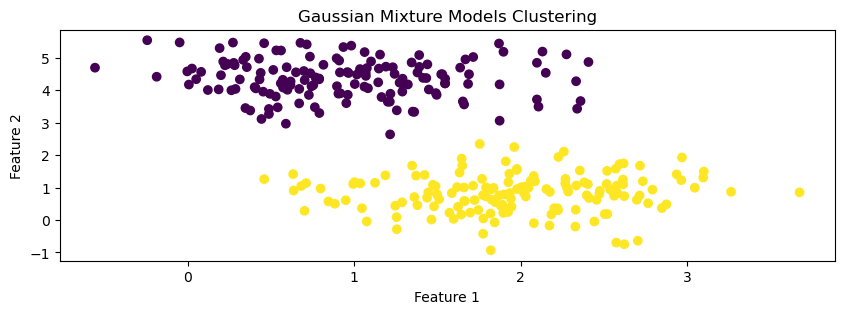

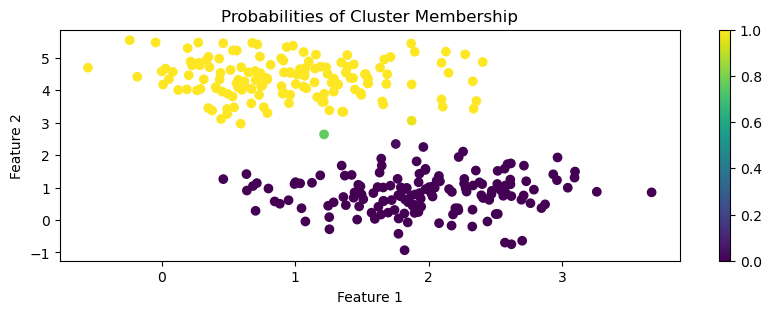

In [519]:
X = blobs()
GMM_plot(X, 2)

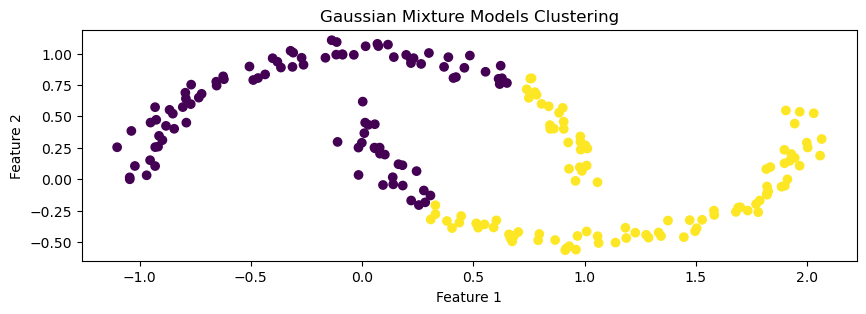

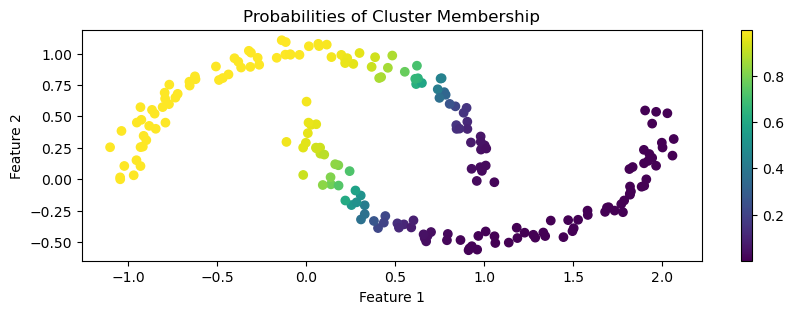

In [520]:
X = moons()
GMM_plot(X , 2)

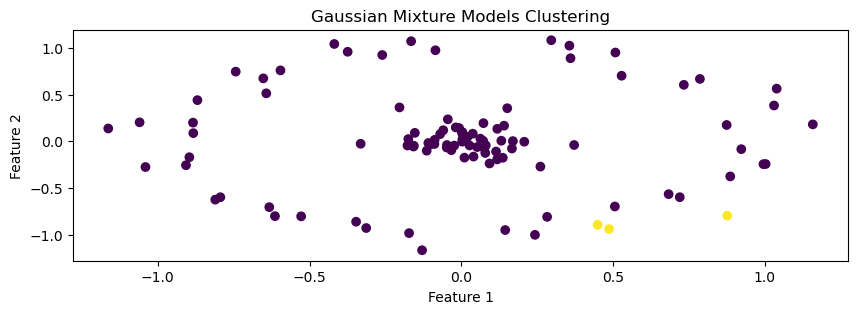

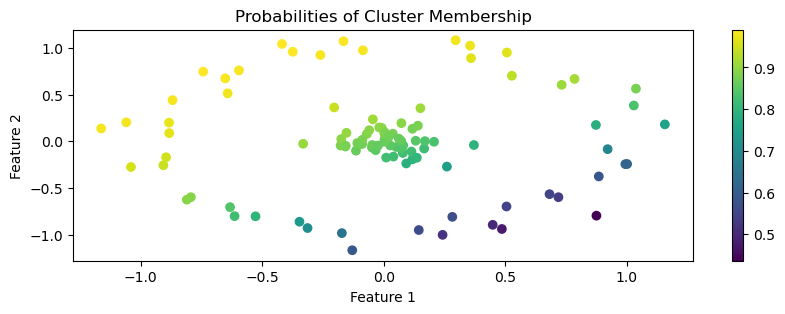

In [521]:
X = circles()
GMM_plot(X , 2)

## Spectral Clustering

- Работает со всеми данными (с не шарообразными в т.ч.)
- желательно n_clusters (но не обязательно)
- affinity - определяет, как вычисляется  связность между точками данных
    - nearest_neighbors (граф  k-ближайших  соседей)
    - rbf (Создает  граф,  где  вес  ребра  определяется  гауссовой  функцией  от  расстояния  между  точками)
    - cosine (Создает  граф,  где  вес  ребра  определяется  косинусной  меркой  сходства  между  точками. )
    - precomputed (Предполагает,  что  вы  уже  задали  матрицу  связности  между  точками)
- assign_labels (Он означает, что после получения собственных векторов матрицы Лапласа будет использоваться определенный алгоритм)
    - kmeans
    -  discretize (Он  разделяет  собственные  векторы  на  кластеры  на  основе  их  значений.  Точки  принадлежат  к  одному  кластеру,  если  их  значения  в  соответствующем  собственном  векторе  близки.)
    - None (  В  этом  случае  собственные  векторы  возвращаются  без  присвоения  меток. Это  полезно,  если  вам  нужно  дальше  обработать  собственные  векторы  или  использовать  их  в  другом  алгоритме  кластеризации.)

---

- Спектральная кластеризация - это метод кластеризации, который использует свойства графа для определения структуры данных\

Он работает:

1. **Создание графа** 
    - преобразовывая данные в граф, где узлы - это точки данных, а ребра - это связи между ними. 

2. **Матрица Лапласа:**
   -  Строится  матрица  Лапласа  графа.  Она  описывает  связность  узлов  в  графе.
   -  Матрица  Лапласа  имеет  свойства,  которые  помогают  выделить  структуру  кластеров  в  данных.

3. **Спектральное разложение:**
   -  Выполняется  спектральное  разложение  матрицы  Лапласа.  (матрица = V*A*V^(-1)) 
        - V - матрица собственных векторов
        - A - диагональная матрица собственных значений
        - V^(-1) - матрица, обратная матрице V
   -  Находят  собственные  векторы  матрицы  Лапласа,  соответствующие  k  наименьшим  собственным  значениям (k - количество кластеров).
   -  Собственные векторы  содержат  информацию  о  структуре  кластеров.

4. **Кластеризация:**
   -  Собственные  векторы  используются  в  качестве  входных  данных  для  алгоритма  кластеризации,  например,  k-средних. 
   -  Точки  данных  кластеризуются  в  соответствии  с  их  принадлежностью  к  разным  кластерам.





In [554]:
from sklearn.cluster import SpectralClustering


def spectralclustering_plot(X, n_clusters):
    spectral = SpectralClustering(n_clusters = n_clusters, affinity = 'nearest_neighbors', assign_labels = 'kmeans')
    labels = spectral.fit_predict(X)
    # Визуализация результатов кластеризации
    plt.figure(figsize=(10, 3))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('Spectral Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

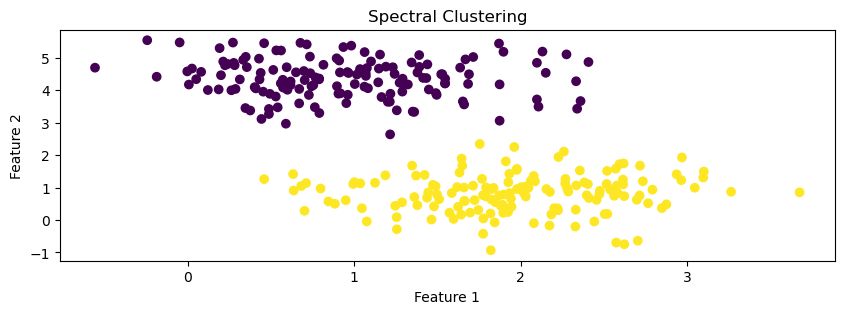

In [555]:
X = blobs()
spectralclustering_plot(X, 2)

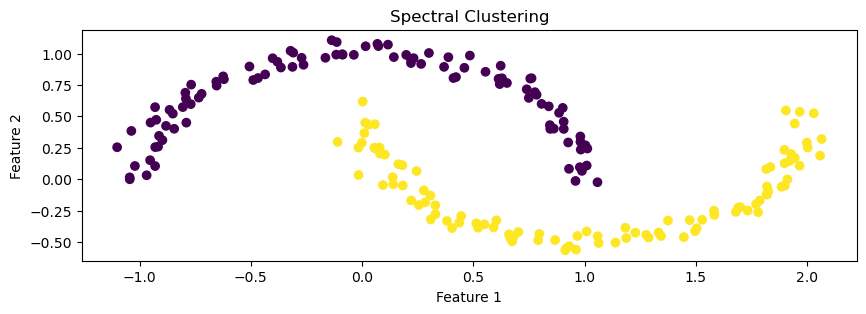

In [556]:
X = moons()
spectralclustering_plot(X, 2)

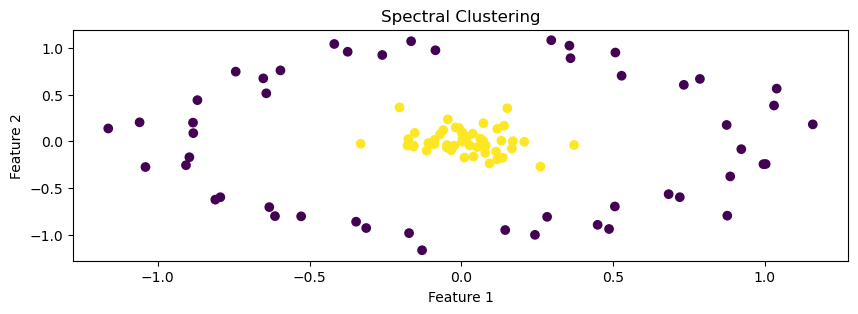

In [557]:
X = circles()
spectralclustering_plot(X, 2)

# Визуализация процесса кластеризации

## Параллельные координаты

- не подходит для большого кол-ва образцов

* Каждая линия на графике представляет один объект данных.
* Цвет линии показывает, к какому кластеру относится объект.
* Положение линии на каждой вертикальной оси показывает значение соответствующего признака.
* Объекты, принадлежащие одному кластеру, имеют схожие значения признаков, поэтому их линии расположены близко друг к другу.

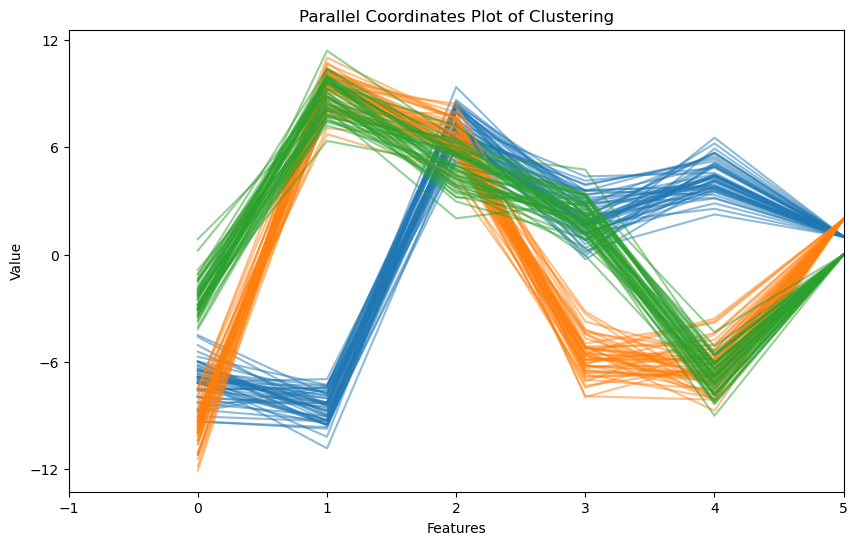

In [597]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.datasets import make_blobs

# 1. Генерация данных
n_samples = 150
n_features = 5
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=3,
                   random_state=random_state)

# 2. Создание DataFrame
df = pd.DataFrame(X, columns=[f'Feature {i+1}' for i in range(n_features)])
df['Cluster'] = y  # Добавление кластеров

# 3. Визуализация
plt.figure(figsize=(10, 6))

for i, cluster in enumerate(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    plt.plot(cluster_data.values.T, color=f'C{i}', alpha=0.5)

# Настройка осей
# plt.xticks(range(n_features), df.columns)
plt.xlim([-1, n_features])
plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Parallel Coordinates Plot of Clustering')

# Ограничение количества тиков
axes = plt.gca()
axes.yaxis.set_major_locator(MaxNLocator(nbins=5))

plt.show()

## Дендограмма

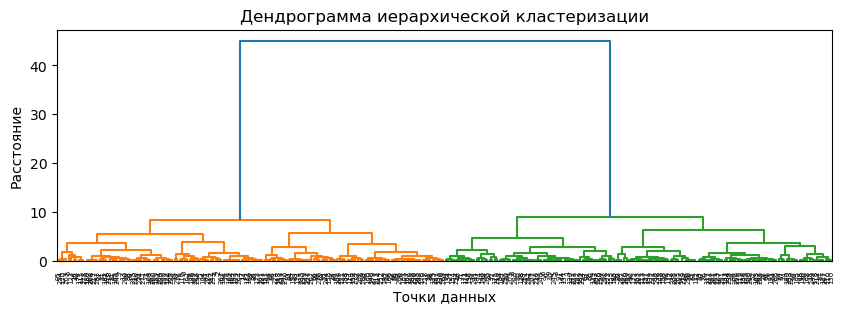

In [593]:
def dendo_plot(X, linkage_mode):
    Z = linkage(X, linkage_mode) # 'ward' 'single' 'average' 'complete'
    plt.figure(figsize=(10, 3))
    dendrogram(Z)
    plt.title('Дендрограмма иерархической кластеризации')
    plt.xlabel('Точки данных')
    plt.ylabel('Расстояние')
    plt.show()

X = blobs()
dendo_plot(X, 'ward')

## Тепловая карта (карта близости каждого образца с каждым)

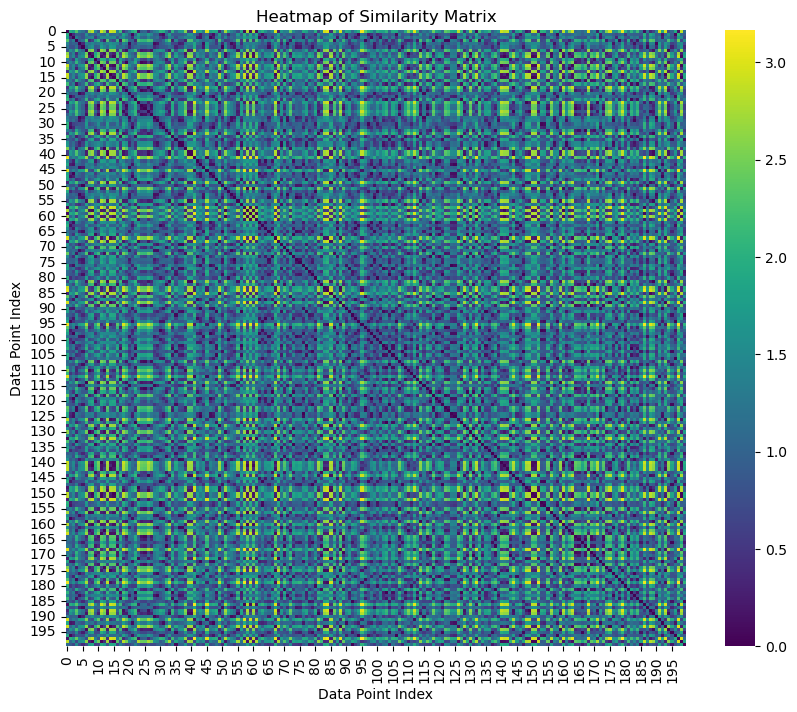

In [592]:
X = moons()

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Матрица сходства (например, евклидово расстояние)
similarity_matrix = np.zeros((X.shape[0], X.shape[0]))
for i in range(X.shape[0]):
    for j in range(i, X.shape[0]):
        similarity_matrix[i, j] = similarity_matrix[j, i] = np.linalg.norm(X[i] - X[j])

# Визуализация тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='viridis', annot=False)  # annot=False для более чистой визуализации
plt.title('Heatmap of Similarity Matrix')
plt.xlabel('Data Point Index')
plt.ylabel('Data Point Index')
plt.show()

## С помощью PCA(n_components = 2) (scatterplot с двумя координатами (сжатыми до 2-х))

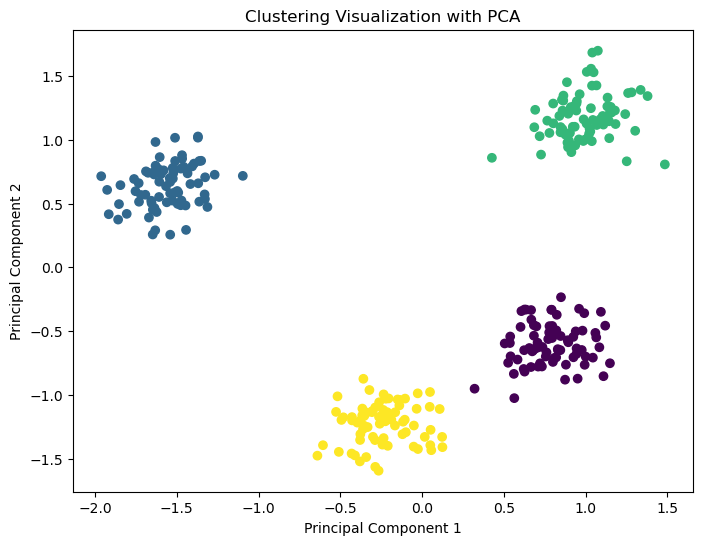

In [598]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Генерация данных
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Кластеризация K-means
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA с 2 компонентами
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Вывод


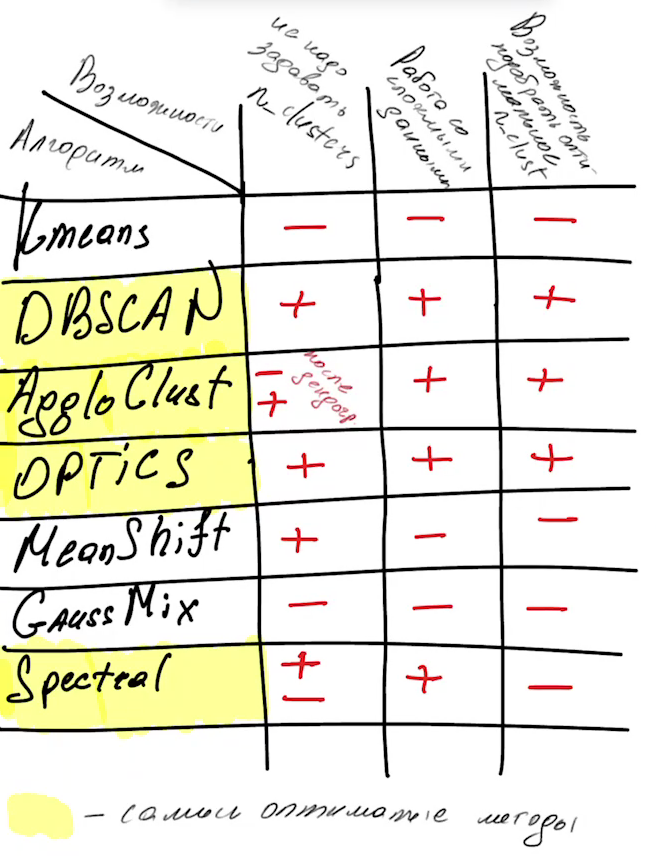